## Presentación Intermedia

### Alumno: Juan Carlos Aldape Pier
### Matrícula: A01411434

#### En este caso trabajare con una base de datos de las peliculas mas taquilleras desde el año 1977 hasta el 2019

#### Primeramente quisiera explicar que los datos estan basados en calificaciones, el costo de la pelicula, cuanto se vendio de dicha pelicula, compañia entre algunos otros valroes interesantes.

#### A continuación necesito importar tanto pandas como numpy

In [1]:
import pandas as pd
import numpy as np

#### Posteriormente necesito instalar seaborn para futuras operaciones

In [2]:
pip install seaborn

     |████████████████████████████████| 292 kB 4.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import seaborn as sns

#### Una ves teniendo esto, procedo a traer la base de datos, cuyo nombre es "Blockbusters_2019-1977.cvs"

In [4]:
%ls

 00_00_binder.ipynb                     Blockbusters_2019-1977.csv
 00_00_primer_pasos.ipynb               _clase1.ipynb
 01_01_data_types.ipynb                 Clase3.ipynb
 01_02_read_iloc_unique_groupby.ipynb   Clase4.ipynb
 02_00_data_wrangling.ipynb             Clase5.ipynb
 02_01_null_display.ipynb              'countries of the world.csv'
 02_02_basic_math.ipynb                 datasets/
 A3_A01411434.ipynb                     README.md
 A5_A01411434.ipynb                     requirements.txt
 adult.csv                              Untitled.ipynb
 antropometria-dataset-2.csv


In [41]:
df = pd.read_csv('Blockbusters_2019-1977.csv',encoding = 'unicode_escape')
df.head()

,release_year,rank_in_year,imdb_rating,mpaa_rating,film_title,film_budget,length_in_min,domestic_distributor,worldwide_gross,domestic_gross,genre_1,genre_2,genre_3
0,2019,1,8.5,PG-13,Avengers: Endgame,"356,000,000",181,Walt Disney,"2,797,800,564","858,373,000",Action,Adventure,Drama
1,2019,2,7.0,PG,The Lion King,"260,000,000",118,Walt Disney,"1,656,943,394","543,638,043",Animation,Adventure,Drama
2,2019,3,7.2,PG,Frozen II,"150,000,000",103,Walt Disney,"1,420,560,456","470,089,732",Animation,Adventure,Comedy
3,2019,4,7.6,PG-13,Spider-Man: Far from Home,"160,000,000",129,Sony Pictures,"1,131,927,996","390,532,085",Action,Adventure,Sci-Fi
4,2019,5,6.9,PG-13,Captain Marvel,"175,000,000",123,Walt Disney,"1,128,274,794","426,829,839",Action,Adventure,Sci-Fi


#### A continuación las diferentes columnas que fui encontrando

In [12]:
df.columns

Index(['release_year', 'rank_in_year', 'imdb_rating', 'mpaa_rating',
       'film_title', 'film_budget', 'length_in_min', 'domestic_distributor',
       'worldwide_gross', 'domestic_gross', 'genre_1', 'genre_2', 'genre_3'],
      dtype='object')

#### Para entender mejor el comportamiento de cada variable de las que tengo identificadas y conocer su tipo lo he divido de forma simple
##### Las variables categóricas serían rank_in_year,film_title, domestic_distributor, y genre_1, genre_2 y genre_3.
##### Las variables numéricas serían release_year, imdb_rating, film_budget, length_in_min, worldwide_gross, domestic_gross

#### Para entender un poco mejor esas variables, se tratan principalmente del año de salida de la pelicula, el ranking del 1 al 10 de ese año, la califcación obtenida en IMDB, la categoría de la pelicula, el nombre de la pelicua, cuanto costo hacerla, cuanto dura la pelicula, quien la produce, ventas en el mundo y en USA y el género.

### Primeramente como dato me gustaría a mi saber cual es la media de la duración de las peliculas que se encuentran dentro del top, para esto realizaré una tabla pivote, que me muestra la media de las peliculas rankeadas como la 1, la 2 y así sucesivamente

In [16]:
my_pivot = pd.pivot_table(df,
                          index = 'rank_in_year',
                          values = ['length_in_min'],
                          aggfunc = 'mean'
                         )
my_pivot

,length_in_min
rank_in_year,
1,135.744186
2,127.790698
3,117.906977
4,124.000000
5,115.976744
6,118.790698
7,116.116279
8,111.418605
9,120.627907


#### ¿Como puede saber que longitudes se repiten mas?
#### Ademas tambien saco un histograma para conocer cuales son los valores de longitud de la pelicula que mas se pueden observar dentro de la lista brindada.

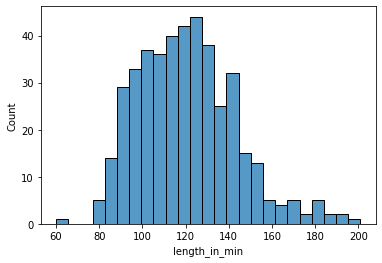

In [19]:
sns.histplot(df['length_in_min'],
             kde = False,
             bins = 25)

### Ahora, si yo quisiera conocer cual es el promedio por año de las peliculas, en cuestión del rating, ¿que debo de hacer? 
### Tendría que hacer uso del valor de 'imdb_rating' debido a que me interesa conocer cual es el promedio de las califiaciones de las mejores peliculas, en todos los años, y para eso realizo lo siguiente:

In [21]:
my_pivot = pd.pivot_table(df,
                          index = 'release_year',
                          values = ['imdb_rating'],
                          aggfunc = 'mean'
                         )
my_pivot

,imdb_rating
release_year,
1977,7.12
1978,7.00
1979,6.99
1980,6.89
1981,7.08
1982,7.07
1983,6.50
1984,7.21
1985,7.27


### Conclusión a la pregunta: Me logro dar cuenta que el mejor "top 10" se dio dentro del año 1991, y le sigue el 2019, lo que habla bien tanto de las peliculas tanto antiguas como las modernas, y que se mantienen todas en un rango entre los 6 altos y los 7 bajos, debido a que este sistema es algo estricto. 

### Ahora lo que quiero conocer es la cuestión de conocer que datos son atipicos y cuales no en el tema del presupuesto que se tenia para las pelculas

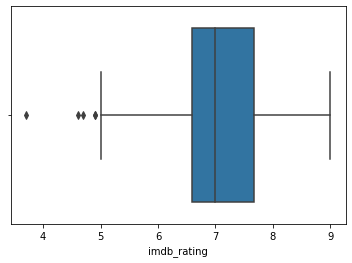

In [33]:
sns.boxplot(x = df['imdb_rating'],
           )

### A continuación hago una relación entre lo que se gasta dentro de una pelicula, y el rating que obtuvo en promedio con ese presupuesto


In [37]:
my_pivot = pd.pivot_table(df,
                          index = 'film_budget',
                          values = ['imdb_rating'],
                          aggfunc = 'mean'
                         )
my_pivot.head(50)

,imdb_rating
film_budget,
"10,000,000",6.720000
"10,500,000",7.800000
"10,700,000",7.300000
"100,000,000",6.544444
"102,000,000",8.050000
"103,000,000",8.500000
"11,000,000",7.380000
"11,200,000",7.700000
"110,000,000",6.412500


### Concluyo de este apartado que no existe una relación tan directa entre el dinero que se invierte para una pelicula, con la calificación que puede llegar a obtener, ya que puedes invertir mucho y que tu pelicula no sea tan bien calificada, o puedes invertir poco y que tu pelicula guste al público

## Por último me quedo con la duda, entre ¿como puedo yo determinar la calificación obtenida en cada año, tomando en cuenta que quiero clasificarlo por el ranking y por cada año?

### Para eso lo que realicé, fue sencillamente una tabla pivote como se puede ver a continuación, y posteriormente realizar un boxplot para poder ver por ejemplo los datos del primer año, y así darme una idea de como se comporta

In [43]:
my_pivot2 = pd.pivot_table(df,
                          index = 'release_year',
                          values = ['imdb_rating'],
                          aggfunc = 'mean',
                          columns = 'rank_in_year'
                         )
my_pivot2

imdb_rating                                             
rank_in_year          1    2    3    4    5    6    7    8    9    10
release_year                                                         
1977                 8.6  7.6  6.8  7.0  7.4  6.2  7.1  6.6  8.0  5.9
1978                 7.2  7.3  5.8  7.5  6.4  6.9  6.3  6.7  8.1  7.8
1979                 6.3  7.8  8.4  5.8  6.2  7.3  6.4  8.4  6.1  7.2
1980                 8.7  7.9  6.8  6.8  7.7  6.2  6.2  7.5  5.3  5.8
1981                 8.4  7.6  6.8  6.9  6.9  6.3  7.2  6.8  6.9  7.0
1982                 7.8  7.4  7.0  7.7  6.8  7.3  6.2  7.7  6.9  5.9
1983                 7.0  7.4  6.2  7.5  3.7  7.1  6.6  6.6  8.3  4.6
1984                 7.6  7.3  7.8  7.3  7.2  6.9  6.7  6.6  8.0  6.7
1985                 8.5  6.9  6.5  7.2  6.1  7.8  6.7  7.4  7.8  7.8
1986                 6.9  6.6  8.1  8.3  6.0  7.3  6.0  6.6  6.9  6.0
1987                 6.9  6.5  7.0  6.0  7.3  7.6  6.5  7.8  7.1  7.9
1988                 8.0  7.7  7.0  5.6  8.1  6.1  5.8  5.9  7.3  8.2
1989                 8.2  7.5  7.8  5.9  7.2  6.3  6.6  7.6  7.2  6.8
1990                 7.0  7.6  7.0  8.0  7.5  7.4  7.2  6.9  6.8  6.1
1991                 8.5  6.9  8.0  6.8  8.6  8.0  6.9  7.3  6.8  6.7
1992                 8.0  6.3  6.7  7.0  6.7  7.0  7.7  6.4  7.4  7.0
1993                 8.1  7.0  7.8  8.9  6.8  5.9  6.4  6.8  7.7  6.6
1994                 8.5  8.8  7.2  6.9  7.2  4.9  7.3  7.0  7.6  6.9
1995                 7.6  8.3  7.6  7.2  6.7  5.4  8.6  6.1  6.2  7.0
1996                 7.0  6.4  7.1  7.4  6.9  5.7  6.6  5.6  7.3  6.1
1997                 7.8  6.6  7.3  6.5  6.5  7.7  6.9  6.3  7.7  7.2
1998                 6.7  8.6  5.4  7.1  7.2  6.2  7.6  5.4  7.1  6.6
1999                 6.5  8.1  7.9  8.7  7.3  7.0  7.1  6.4  8.3  6.6
2000                 6.1  8.5  7.8  6.4  6.5  6.1  7.0  6.4  7.4  6.6
2001                 7.6  8.8  8.0  7.8  7.8  6.2  6.3  5.9  5.7  6.8
2002                 8.7  7.4  7.3  6.5  6.2  6.1  6.7  7.5  6.5  7.6
2003                 8.9  8.1  7.2  8.0  6.7  7.7  6.3  6.7  7.4  6.6
2004                 7.2  7.9  7.3  8.0  7.1  6.4  6.3  7.2  6.0  6.5
2005                 7.7  7.5  6.9  6.5  7.2  6.9  6.5  6.6  8.2  6.6
2006                 7.3  6.6  6.8  8.0  6.4  7.1  6.7  6.9  6.0  6.4
2007                 7.1  7.5  6.2  6.0  7.0  8.0  7.2  7.3  6.5  7.6
2008                 9.0  6.1  7.5  6.4  6.4  6.6  6.6  7.9  8.4  6.5
2009                 7.8  7.6  6.9  6.0  5.8  8.2  4.7  7.6  6.7  7.7
2010                 8.3  6.4  7.7  8.8  6.3  5.0  7.0  7.7  7.6  8.1
2011                 8.1  6.2  6.6  4.9  7.4  7.2  7.3  6.4  5.4  6.1
2012                 8.0  7.7  8.4  7.8  6.6  5.5  6.9  6.8  7.2  6.8
2013                 7.5  7.2  7.3  7.8  7.5  7.1  7.3  7.7  7.1  6.9
2014                 5.6  7.4  8.0  7.0  6.6  8.0  7.7  7.6  6.6  8.6
2015                 7.9  7.0  7.2  7.3  6.4  6.8  6.5  8.2  7.4  6.5
2016                 7.8  7.8  7.3  8.0  7.4  6.5  6.6  8.0  6.0  7.5
2017                 7.0  7.1  6.7  6.3  6.9  7.4  6.0  7.6  7.9  7.4
2018                 8.5  7.3  6.2  7.7  7.0  8.0  6.7  7.8  7.7  6.6
2019                 8.5  7.0  7.2  7.6  6.9  7.9  8.6  7.0  6.9  6.5

In [44]:
my_pivot2.columns

MultiIndex([('imdb_rating',  1),
            ('imdb_rating',  2),
            ('imdb_rating',  3),
            ('imdb_rating',  4),
            ('imdb_rating',  5),
            ('imdb_rating',  6),
            ('imdb_rating',  7),
            ('imdb_rating',  8),
            ('imdb_rating',  9),
            ('imdb_rating', 10)],
           names=[None, 'rank_in_year'])

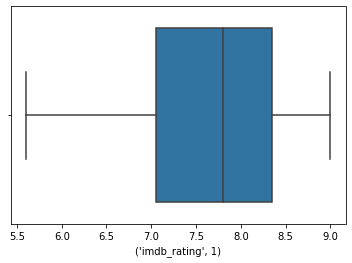

In [45]:
sns.boxplot(x = my_pivot2['imdb_rating', 1],
            whis = (0,100),
           )

### Algunas de las limitaciones que me enfrente al realizar la manipulación de esta base de datos fueron primordialmente que en un principio el Jupiter no me dejaba manipular algunos datos, por lo que tuve que colocar la función de unicode.escape para poder utilizar la base de datos. Otra limitación fue a la hora de realizar la busqueda de las bases de datos, que se me hizo un tanto extensa.

### Otra gran limitación que se me presento es que no pude utilizar las ultimas dos columnas, ya que solo considero como neceario el primer género, y algunas no se identifican con varios géneros distintos

# Me llevo muchos aprendizajes de esta base de datos, me llevo algunos puntos críticos con relación a la duración, el año, el dinero invertido y la puntuación asignada para dicha pelicula.